In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Linear Regression is a major application of Machine Learning. In this algorithm, the machine predicts the output of a certain input which is a result of machines training using a training data set. Linear Regression comes under Supervised Machine Learning. In this file, I have written the code for multivariable linear regression where there are more than one features and bias

In [60]:
data=pd.read_csv('/content/drive/MyDrive/Training dataset/linear_train (1).csv')
X=data.iloc[:,0:20].values
y=data.iloc[:,20].values
X_t=data.iloc[45000:50000,0:20].values
y_t=data.iloc[45000:50000,20].values
w=np.zeros(20)
b=0
print(np.shape(X))
print(np.shape(y))

(50000, 20)
(50000,)


In [61]:
def compute_cost(X, y, w, b):   
  m,n = np.shape(X)
  cost=np.sum(np.power(((np.matmul(X,w)-y)+b),2))
  cost=cost/(2*m)                          
  return cost

In [62]:
def gr(X,y,w,b):
  m,n=np.shape(X)
  dj_dw=np.zeros((n,))
  dj_db=0
  k=np.zeros(m)

  k=(np.matmul(X,w)-y)+b
  dj_db=np.sum(k)/m
  for j in range(n):
    dj_dw[j]=np.dot(X[:,j],k)
  dj_dw=dj_dw/m
  return dj_db,dj_dw

In [63]:
def zscore(X):
  mu=np.mean(X, axis=0)
  sigma=np.std(X,axis=0)
  X_1=(X-mu)/sigma
  return X_1,mu,sigma
X,mu,sigma=zscore(X)

In [64]:
def gradient_descent_cal(X,y,w,b,compute_cost,gradient,alpha,num):
  j_his=[]
  for i in range(num):
    dj_db,dj_dw = gr(X,y,w,b)
    w = w - alpha*dj_dw     
    b = b - alpha*dj_db  
    if i<=1001:
      j_his.append(compute_cost(X,y,w,b)) 
    if (i%50) == 0:
      print("iteration: ",i)  
      print("cost :",j_his[i])
  return w,b,j_his  

iteration:  0
cost : 24952.35681741128
iteration:  50
cost : 4770.271035872182
iteration:  100
cost : 4769.768716934599
iteration:  150
cost : 4769.768702438647
iteration:  200
cost : 4769.768702438213
iteration:  250
cost : 4769.768702438213
[72.99699525 66.2490529  97.44251859  1.71779334 17.36335083 24.81613091
 71.23331344 30.9955866  20.35046335 93.74922464 39.36887221 37.25519822
  2.8278407  40.70115185 40.70115177 46.08723061 21.51569206 33.84608326
 33.68446216 39.24757583]
-0.3656507348417397


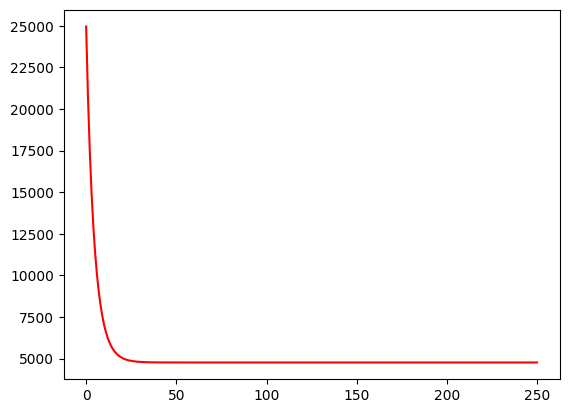

In [65]:
num=251
alpha= 0.1
j=[]
w,b,j=gradient_descent_cal(X,y,w,b,compute_cost,gr,alpha,num)
print(w)
print(b) 
#cost vs iteration graph plot
#for i in range(num):
#  plt.plot(i,j[i])
plt.plot(np.arange(num),j,c='red')
plt.show()

In [66]:
X_t=(X_t-mu)/sigma

y1=(np.matmul(X_t,w))+b
mean=np.sum(y_t)/5000
e1=np.sum(np.square(y1-y_t))
e2=np.sum(np.square(y_t-mean))
acc=1-(e1/e2)
print(acc)

0.8447366356651903
